In [31]:
import pandas as pd
import quandl

#Retrieve data from Quandl
QUANDL_API_KEY = 'RGez7azaXNMJjoxSNpEA'
quandl.ApiConfig.api_key = QUANDL_API_KEY
df = quandl.get('EURONEXT/ABN')

In [32]:
#prints first five rows and columns
df.head()

,Open,High,Low,Last,Volume,Turnover
Date,,,,,,
2015-11-20,18.18,18.43,18.000,18.35,38392898.0,7.003281e+08
2015-11-23,18.45,18.70,18.215,18.61,3352514.0,6.186446e+07
2015-11-24,18.70,18.80,18.370,18.80,4871901.0,8.994087e+07
2015-11-25,18.85,19.50,18.770,19.45,4802607.0,9.153862e+07
2015-11-26,19.48,19.67,19.410,19.43,1648481.0,3.220713e+07


In [33]:
#prints last 5 rows but first 5 columns 
df.tail()

,Open,High,Low,Last,Volume,Turnover
Date,,,,,,
2021-05-26,10.89,10.890,10.496,10.644,3447200.0,36676187.0
2021-05-27,10.60,10.980,10.584,10.902,3498258.0,38042273.0
2021-05-28,10.90,10.998,10.856,10.964,3001692.0,32847836.0
2021-05-31,11.00,11.030,10.920,10.920,1426676.0,15650390.0
2021-06-01,10.98,11.220,10.980,11.142,2689318.0,29976401.0


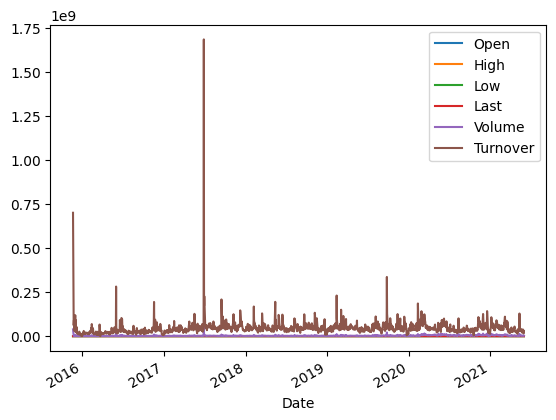

In [34]:
#create plot using pandas
%matplotlib inline
import matplotlib.pyplot as plt
df.plot();

In [35]:
#Plotting a price and volume chart
prices = df['Last']
volumes = df['Volume']

prices.head()

Date
2015-11-20    18.35
2015-11-23    18.61
2015-11-24    18.80
2015-11-25    19.45
2015-11-26    19.43
Name: Last, dtype: float64

In [36]:
volumes.tail()


Date
2021-05-26    3447200.0
2021-05-27    3498258.0
2021-05-28    3001692.0
2021-05-31    1426676.0
2021-06-01    2689318.0
Name: Volume, dtype: float64

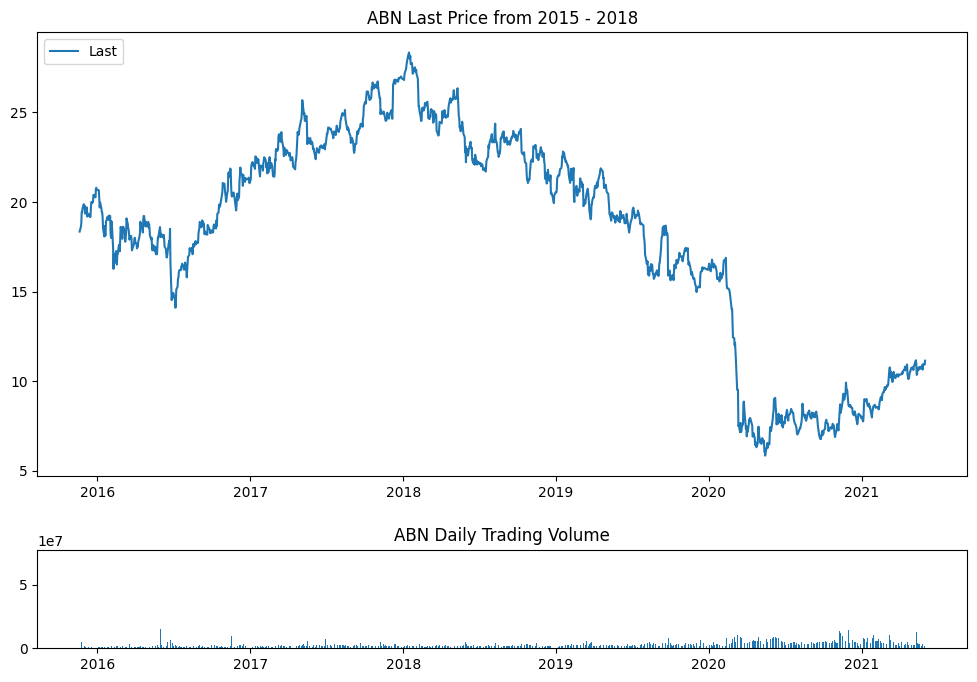

In [37]:
##The top plot consisting of daily closing prices
top = plt.subplot2grid((4, 4), (0, 0), rowspan=3, colspan=4)
top.plot(prices.index, prices, label='Last')
plt.title('ABN Last Price from 2015 - 2018')
plt.legend(loc=2)

##The bottom plot consisting of daily trading volume
bottom = plt.subplot2grid((4, 4), (3, 0), rowspan=1, colspan=4)
bottom.bar(volumes.index, volumes)
plt.title('ABN Daily Trading Volume')

plt.gcf().set_size_inches(12, 8)
plt.subplots_adjust(hspace=0.75)

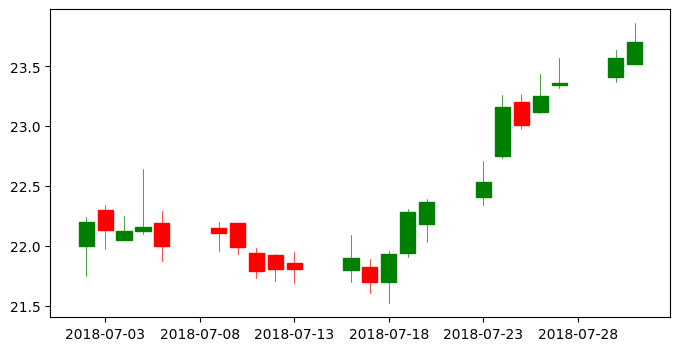

In [38]:
#Plotting a candlestick chart
%matplotlib inline 
import quandl
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

##Retrieve prices
quandl.ApiConfig.api_key = QUANDL_API_KEY
df_subset = quandl.get('EURONEXT/ABN', start_date='2018-07-01', end_date='2018-07-31')

##creates new Date column
df_subset['Date'] = df_subset.index.map(mdates.date2num)

df_ohlc = df_subset[['Date', 'Open', 'High', 'Low', 'Last']]

##Creates plot of size 8,4
figure, ax = plt.subplots(figsize=(8,4))
formatter = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(formatter)

##call candlestick command
candlestick_ohlc(ax, df_ohlc.values, width=0.8, colorup='green', colordown='red')
plt.show()

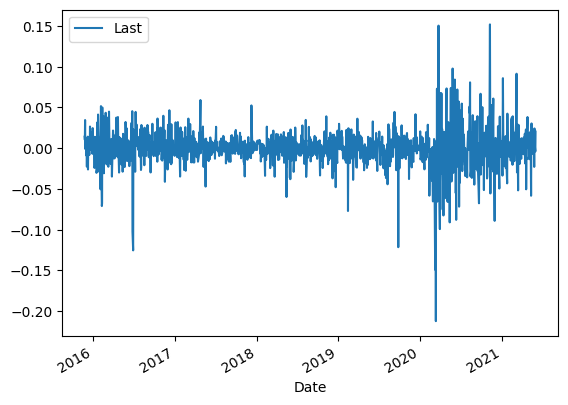

In [39]:
#Plotting returns
%matplotlib inline
import quandl

quandl.ApiConfig.api_key = QUANDL_API_KEY

##Only retrieves the fourth column o data set
df = quandl.get('EURONEXT/ABN.4')

##forms percent change
daily_changes = df.pct_change(periods=1)
daily_changes.plot();

<Axes: xlabel='Date'>

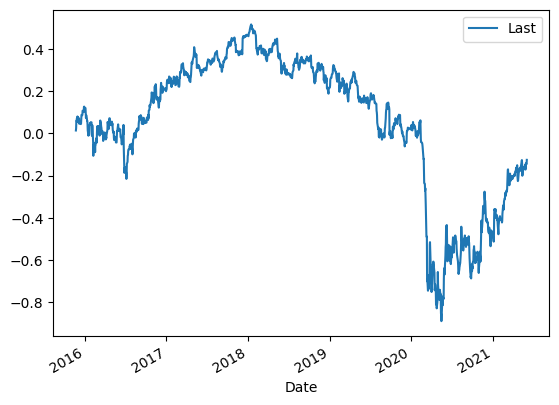

In [40]:
#Plotting cumulative returns
##plots the cumulative sum of daily_changes of ABN
df_cumsum = daily_changes.cumsum()
df_cumsum.plot()

,Last
count,1408.000000
mean,-0.000089
std,0.022877
min,-0.212453
25%,-0.009574
50%,0.000283
75%,0.009749
max,0.152042


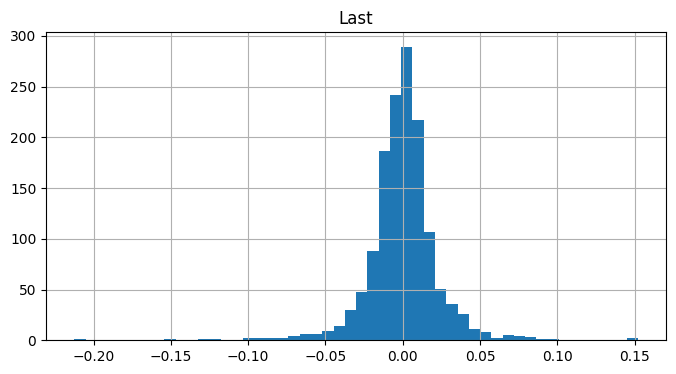

In [41]:
#Plotting a histogram
##Shows how distributed the daily reutrns of ABN are
daily_changes.hist(bins=50, figsize=(8, 4));

##summarize central tendency, dispersion, and shape of distribution
daily_changes.describe()


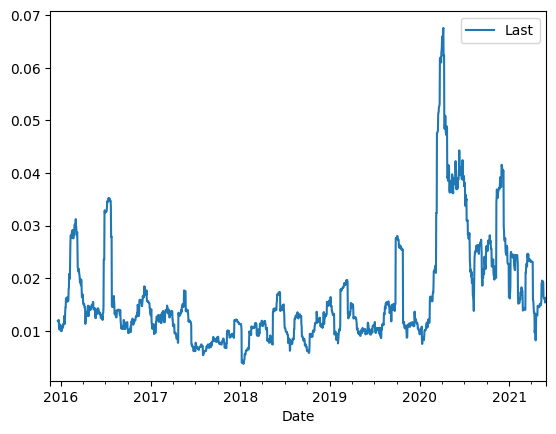

In [42]:
#Plotting volatility
##re-index time series data on a daily frequency
df_filled = df.asfreq('D', method='ffill')
df_returns = df_filled.pct_change()
##window = standard deviation period, min_period = excludes first 30 rows
df_std = df_returns.rolling(window=30, min_periods=30).std()
df_std.plot();

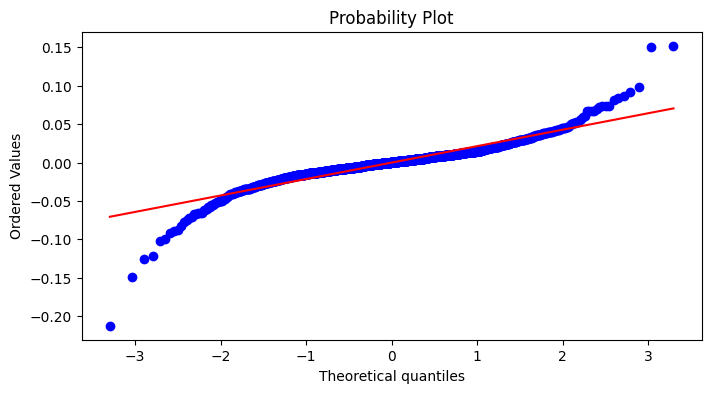

In [43]:
#(Q-Q)Quantile-quantile plot
from scipy import stats
from scipy.stats import probplot

daily_changes = df.pct_change(periods=1).dropna()

figure = plt.figure(figsize=(8,4))
ax = figure.add_subplot(111)
##Uses last prices on the ABN stock to compute daily percent change
stats.probplot(daily_changes['Last'], dist='norm', plot=ax)
plt.show();
##most of the data falls on the line between qunatiles -2 and +2 showing a normal distribution

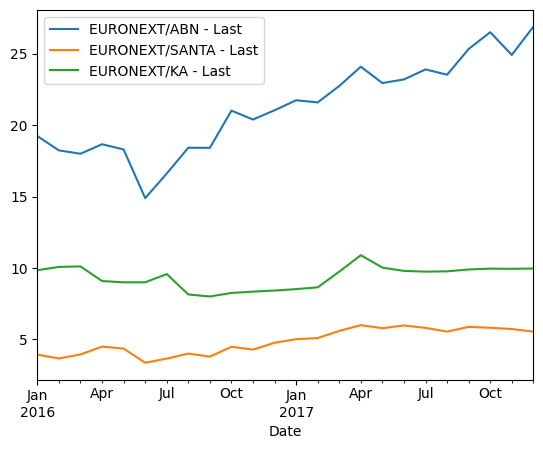

In [44]:
#Downloading multiple time series data
##collapse=monthly for monthly prices
df = quandl.get(['EURONEXT/ABN.4', 'EURONEXT/SANTA.4', 'EURONEXT/KA.4'],
                collapse='monthly', start_date='2016-01-01', end_date='2017-12-31')
df.plot();

In [45]:
#Displaying the correlation matrix
df.pct_change().corr()

,EURONEXT/ABN - Last,EURONEXT/SANTA - Last,EURONEXT/KA - Last
EURONEXT/ABN - Last,1.000000,0.809824,0.096238
EURONEXT/SANTA - Last,0.809824,1.000000,0.058095
EURONEXT/KA - Last,0.096238,0.058095,1.000000


C:\Users\chanc\AppData\Local\Temp\ipykernel_4772\4027007028.py:7: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_changes = df_filled.pct_change()


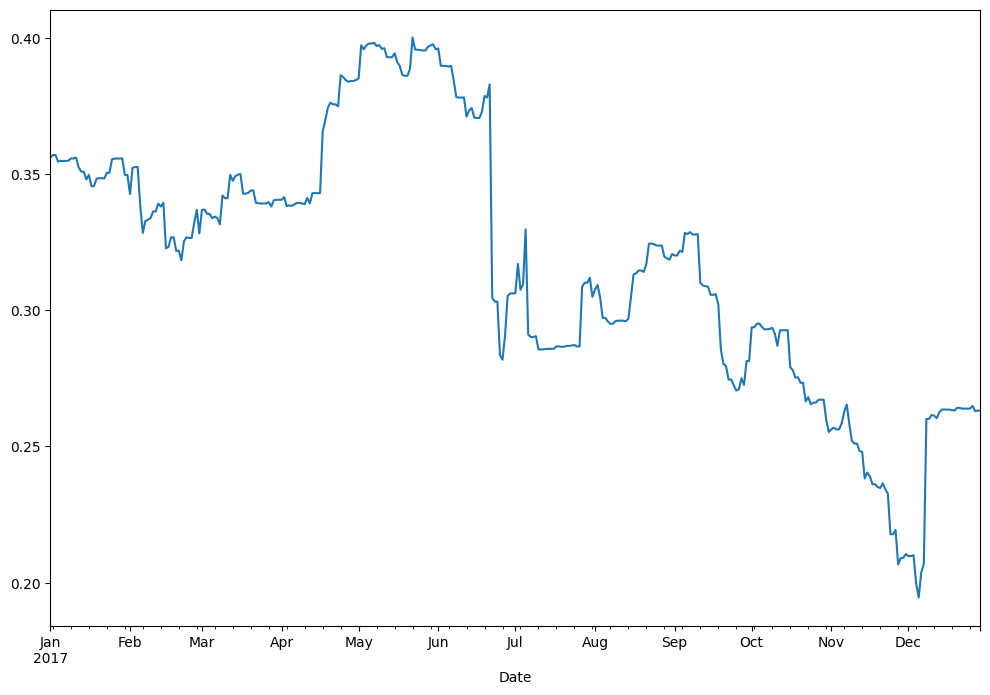

In [46]:
#Plotting correlations
df = quandl.get(['EURONEXT/ABN.4', 'EURONEXT/SANTA.4'],
                start_date='2016-01-01', end_date='2017-12-31')
##re-indexed on  a daily frequency
df_filled = df.asfreq('D', method='ffill')
## exctract columns into abn_returns and santa_returns
daily_changes = df_filled.pct_change()
abn_returns = daily_changes['EURONEXT/ABN - Last']
santa_returns = daily_changes['EURONEXT/SANTA - Last']
##perform a one-year rolling correlation
window = int(len(df_filled.index)/2)
##correlation only calcualted when the full sample size is present
df_corrs = abn_returns\
            .rolling(window=window, min_periods=window)\
            .corr(other=santa_returns)\
            .dropna()
##displays chart of one-year rolling correlation of daily returns in 2017
df_corrs.plot(figsize=(12,8));

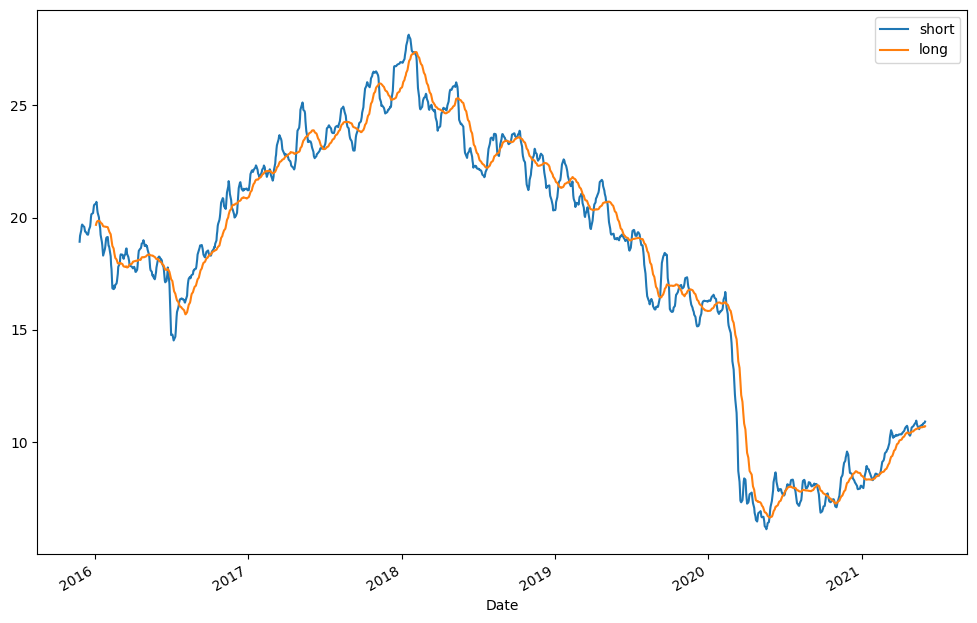

In [50]:
#Simple moving averages
df = quandl.get('EURONEXT/ABN.4')

df_filled = df.asfreq('D', method='ffill')
df_last = df['Last']
##5-day average for short term sma and 30 day for long-term sma
##min_periods excludes first rows that have too small smaple size
series_short = df_last.rolling(window=5, min_periods=5).mean()
series_long = df_last.rolling(window=30, min_periods=30).mean()
##df_sma is a newly created pandas dataframe for storing sma computations
df_sma = pd.DataFrame(columns=['short', 'long'])
df_sma['short'] = series_short
df_sma['long'] = series_long
df_sma.plot(figsize=(12, 8));

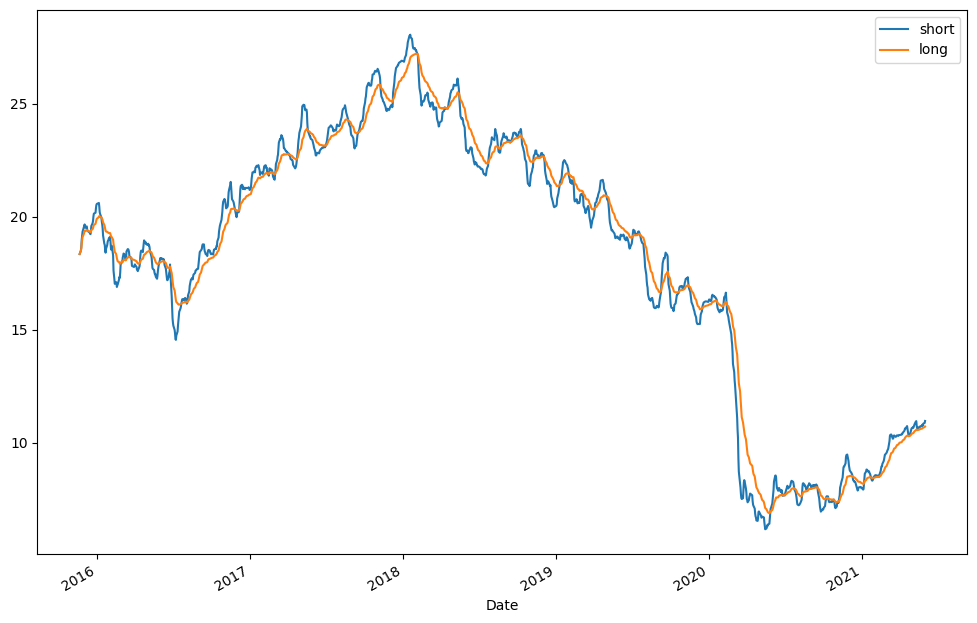

In [56]:
#Exponential moving averages
df_filled = df.asfreq('D', method='ffill')
df_last = df['Last']
##ewm() provides exponential weighted functions
##span specifies the window period for the decay behavior
series_short = df_last.ewm(span=5).mean()
series_long = df_last.ewm(span=30).mean()

df_sma = pd.DataFrame(columns=['short', 'long'])
df_sma['short'] = series_short
df_sma['long'] = series_long
df_sma.plot(figsize=(12, 8));

In [61]:
#Linear regression with SciPy
from scipy import stats
##perform leaast-squares regression on CAPM model
stock_returns = [0.065, 0.0265, -00.0593, -0.001, 0.0346]
mkt_returns = [0.055, -0.09, -0.041, 0.045, 0.022]
beta, alpha, r_value, p_value, std_err = \
    stats.linregress(stock_returns, mkt_returns)
print(beta, alpha)

0.5077431878770808 -0.008481900352462384
